In [1]:
#### 1 - Load the Dataset and Parse Dates: Load the "Seattle Weather" dataset and parse the date column into a Pandas datetime object.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# URL to the COVID-19 time series dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data\
/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# Load the dataset
df = pd.read_csv(url)

# Melt the DataFrame to have a column for dates and a column for values
df_melted = df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"],
                    var_name="Date", value_name="Confirmed")

# Convert the 'Date' column to datetime
df_melted['Date'] = pd.to_datetime(df_melted['Date'] , format='mixed')

# Display the first few rows of the dataset
print("COVID-19 Time Series Dataset:")
print(df_melted.head())

COVID-19 Time Series Dataset:
  Province/State Country/Region       Lat       Long       Date  Confirmed
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0
1            NaN        Albania  41.15330  20.168300 2020-01-22          0
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0
4            NaN         Angola -11.20270  17.873900 2020-01-22          0


In [2]:
### 2 - Handling Time Series Data: Convert the date column to Pandas.Timestamp and Pandas.Period.
# Convert Date column to Pandas.Timestamp (already done during parsing)
df_melted['Timestamp'] = pd.to_datetime(df_melted['Date'])

# Convert Date column to Pandas.Period
df_melted['Period'] = df_melted['Date'].dt.to_period('M')

print("\nDataset with Pandas.Timestamp and Pandas.Period:")
print(df_melted.head())


Dataset with Pandas.Timestamp and Pandas.Period:
  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Timestamp   Period  
0 2020-01-22  2020-01  
1 2020-01-22  2020-01  
2 2020-01-22  2020-01  
3 2020-01-22  2020-01  
4 2020-01-22  2020-01  


In [3]:
### 3 - Define a date range and filter the dataset within this range.
# Define a date range
start_date = '2020-03-01'
end_date = '2020-06-01'

# Filter data within the date range
df_filtered = df_melted[(df_melted['Date'] >= start_date) & (df_melted['Date'] <= end_date)]

print("\nFiltered Data (Within Specified Date Range):")
print(df_filtered.head())


Filtered Data (Within Specified Date Range):
      Province/State Country/Region       Lat       Long       Date  \
11271            NaN    Afghanistan  33.93911  67.709953 2020-03-01   
11272            NaN        Albania  41.15330  20.168300 2020-03-01   
11273            NaN        Algeria  28.03390   1.659600 2020-03-01   
11274            NaN        Andorra  42.50630   1.521800 2020-03-01   
11275            NaN         Angola -11.20270  17.873900 2020-03-01   

       Confirmed  Timestamp   Period  
11271          5 2020-03-01  2020-03  
11272          0 2020-03-01  2020-03  
11273          1 2020-03-01  2020-03  
11274          0 2020-03-01  2020-03  
11275          0 2020-03-01  2020-03  


In [4]:
### 4 - Set the datetime column as the index of the DataFrame and create DatetimeIndex and PeriodIndex.
# Set the 'Date' column as the index
df_melted.set_index('Date', inplace=True)

# Display the DataFrame with the new index
print("\nDataFrame with 'Date' as Index:")
print(df_melted.head())

# Create a DatetimeIndex
df_melted['DatetimeIndex'] = pd.DatetimeIndex(df_melted.index)
print("\nDataFrame with 'DatetimeIndex':")
print(df_melted.head())

# Create a PeriodIndex
df_melted['PeriodIndex'] = df_melted.index.to_period('M')
print("\nDataFrame with 'PeriodIndex':")
print(df_melted.head())


DataFrame with 'Date' as Index:
           Province/State Country/Region       Lat       Long  Confirmed  \
Date                                                                       
2020-01-22            NaN    Afghanistan  33.93911  67.709953          0   
2020-01-22            NaN        Albania  41.15330  20.168300          0   
2020-01-22            NaN        Algeria  28.03390   1.659600          0   
2020-01-22            NaN        Andorra  42.50630   1.521800          0   
2020-01-22            NaN         Angola -11.20270  17.873900          0   

            Timestamp   Period  
Date                            
2020-01-22 2020-01-22  2020-01  
2020-01-22 2020-01-22  2020-01  
2020-01-22 2020-01-22  2020-01  
2020-01-22 2020-01-22  2020-01  
2020-01-22 2020-01-22  2020-01  

DataFrame with 'DatetimeIndex':
           Province/State Country/Region       Lat       Long  Confirmed  \
Date                                                                       
2020-01-22        

In [5]:
### 5 - Using resample function, downsample the data to monthly frequency and upsample it to daily frequency.
# Downsample the data to monthly frequency
df_monthly = df_melted.resample('M').agg('count')

print("\nDownsampled Data (Monthly Frequency):")
print(df_monthly.head())

# Upsample the data to daily frequency (interpolation method)
df_daily = df_monthly.resample('D').interpolate()

print("\nUpsampled Data (Daily Frequency):")
print(df_daily.head())


Downsampled Data (Monthly Frequency):
            Province/State  Country/Region   Lat  Long  Confirmed  Timestamp  \
Date                                                                           
2020-01-31             910            2890  2870  2870       2890       2890   
2020-02-29            2639            8381  8323  8323       8381       8381   
2020-03-31            2821            8959  8897  8897       8959       8959   
2020-04-30            2730            8670  8610  8610       8670       8670   
2020-05-31            2821            8959  8897  8897       8959       8959   

            Period  DatetimeIndex  PeriodIndex  
Date                                            
2020-01-31    2890           2890         2890  
2020-02-29    8381           8381         8381  
2020-03-31    8959           8959         8959  
2020-04-30    8670           8670         8670  
2020-05-31    8959           8959         8959  

Upsampled Data (Daily Frequency):
            Province/S

/tmp/ipython-input-4155866792.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_melted.resample('M').agg('count')


In [6]:
### 6 - Moving window functions: Calculate the rolling mean with a window of 30 days and the expanding sum of precipitation. Print 30 records.
# Calculate the rolling mean with a window of 30 days
df_melted['Rolling_Mean'] = df_melted['Confirmed'].rolling(window=30).mean()

# Calculate the expanding sum
df_melted['Expanding_Sum'] = df_melted['Confirmed'].expanding().sum()

print("\nDataFrame with Rolling Mean and Expanding Sum:")
print(df_melted[['Confirmed', 'Rolling_Mean', 'Expanding_Sum']].head(30))


DataFrame with Rolling Mean and Expanding Sum:
            Confirmed  Rolling_Mean  Expanding_Sum
Date                                              
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           NaN            0.0
2020-01-22          0           Na

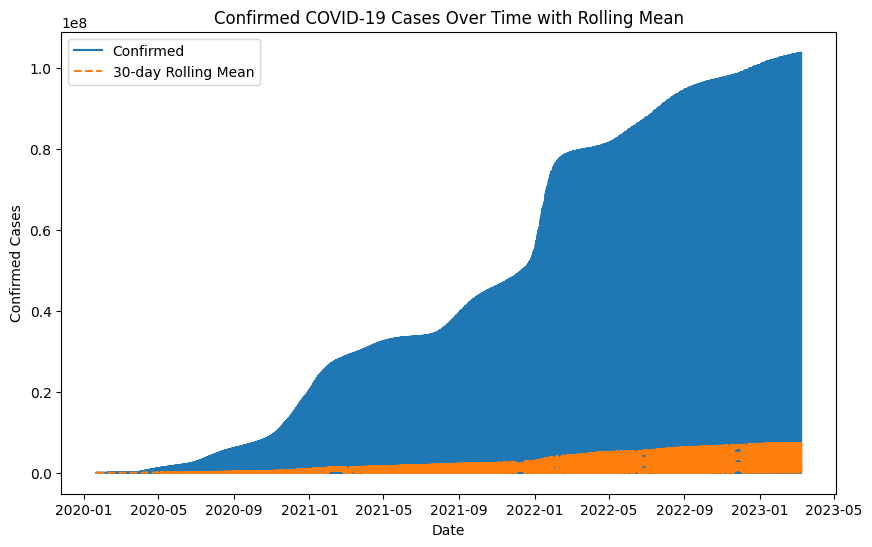

In [7]:
### 7 - Visualize the Time Series Data: Visualize the time series data using Matplotlib line plot showing the original data and the rolling mean.
# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_melted.index, df_melted['Confirmed'], label='Confirmed')
plt.plot(df_melted.index, df_melted['Rolling_Mean'], label='30-day Rolling Mean', linestyle='--')
plt.title('Confirmed COVID-19 Cases Over Time with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

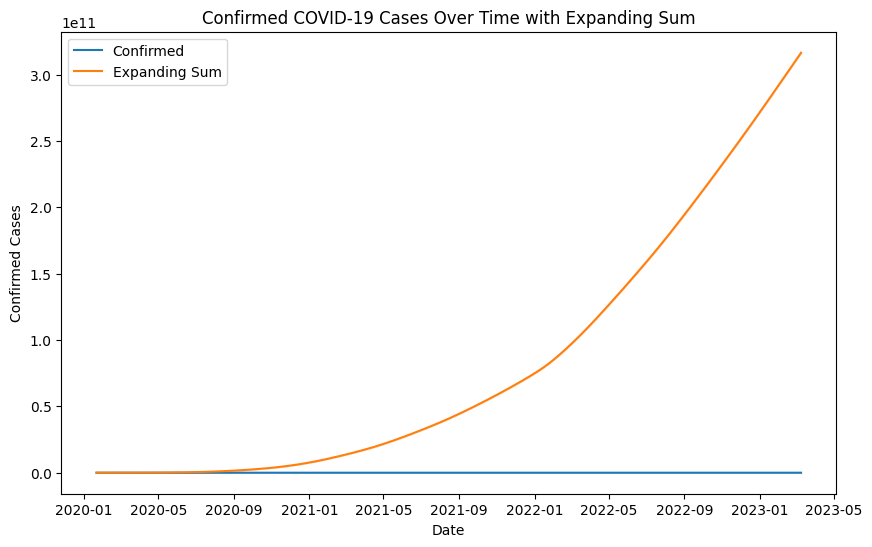

In [8]:
### 8 - Visualize the time series data using Seaborn line plot showing the original data and the expanding sum.
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_melted.index, y='Confirmed', data=df_melted, label='Confirmed')
sns.lineplot(x=df_melted.index, y='Expanding_Sum', data=df_melted, label='Expanding Sum')
plt.title('Confirmed COVID-19 Cases Over Time with Expanding Sum')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

In [9]:
### 9 - Visualize the time series data using Plotly subplot showing the original data, the rolling mean, and the expanding sum.
# Plot using Plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(rows=3, cols=1)

# Add traces
fig.add_trace(
    go.Scatter(x=df_melted.index, y=df_melted['Confirmed'], name='Confirmed'),
    row=1, col=1)

# Add second series
fig.add_trace(
    go.Scatter(x=df_melted.index, y=df_melted['Rolling_Mean'], name='Rolling Mean',
               line=dict(color='red')),
    row=2, col=1)

# Add third series
fig.add_trace(
    go.Scatter(x=df_melted.index, y=df_melted['Expanding_Sum'], name='Expanding Sum',
               line=dict(color='green')),
    row=3, col=1)

fig.update_layout(title_text="Subplots with Plotly")
fig.show()

Output hidden; open in https://colab.research.google.com to view.